# Data Science: Primeiros passos

## 01. Data Science: dados e visualizações

### Analisando as notas em geral

> Conhecendo nossos dados e o Pandas

In [1]:
import pandas as pd

notas = pd.read_csv('ratings.csv')

#mostrar os 5 primeiros elementos
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
#Verificar os formatos da tabela
notas.shape

(100836, 4)

In [3]:
#trocando os nomes das colunas
notas.columns = ["usuarioId", "filmeId", "nota", "momento"]
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
#Verificando todos os valores de nota
#(Serie)
notas['nota']

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [5]:
#Verificando todos os valores únicos de nota
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

Note que a Serie <font color="green">nota</font> vai de 1 - 5

In [6]:
#Contando os valores de nota
#Perceba que é retornado do que mais aparece para a menor opção
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [7]:
#Verificando a média
notas['nota'].mean()

3.501556983616962

> Visualizando dados com histograma e boxplot

In [8]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

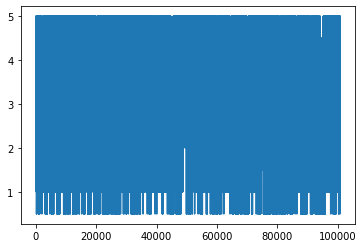

In [9]:
notas.nota.plot()

 O gráfico plot não foi eficiente para esse tipo de análise. Será necessário fazer plot com o tipo <font color="orange">histograma</font>

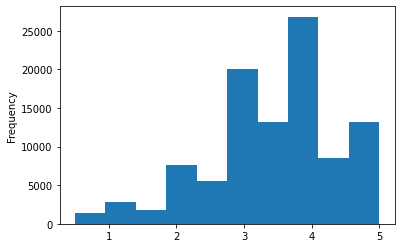

In [10]:
notas.nota.plot(kind='hist')

Identificando a mediana

In [11]:
print(f"Média: {notas['nota'].mean()}")
print(f"Mediana: {notas['nota'].median()}")

Média: 3.501556983616962
Mediana: 3.5


In [12]:
#Verificar diversas medidas para entender os dados
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


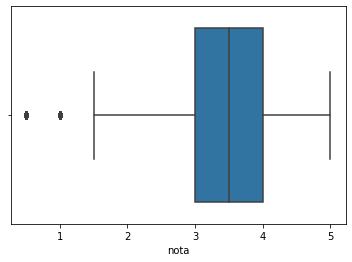

In [13]:
import seaborn as sns

sns.boxplot(notas.nota)

O boxplot é, resumidamente, a forma visual da função <font color="red">describe()</font>

## 02. Análise exploratória

### Olhando os filmes

In [14]:
filmes = pd.read_csv('movies.csv') # Lendo os filmes
filmes.columns = ["filmesId", "titulo", "generos"] #alterando nomes da coluna
filmes.head()

,filmesId,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [15]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Analisando algumas notas específicas por filmes

In [16]:
#retornando a média somente das linhas com o filmeId 01
notas.query("filmeId==1").nota.mean()

3.9209302325581397

In [17]:
#retornando a média somente das linhas com o filmeId 02
notas.query("filmeId==2").nota.mean()

3.4318181818181817

In [18]:
# Agrupando todas as notas pelo filmeId e verificando a média
medias_por_filme = notas.groupby("filmeId").mean()["nota"]
medias_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

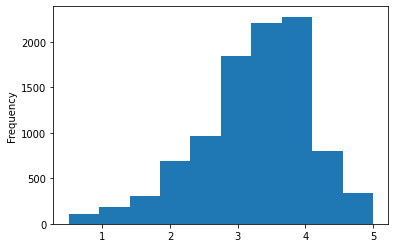

In [19]:
# Verificando as médias por filmes
medias_por_filme.plot(kind='hist')

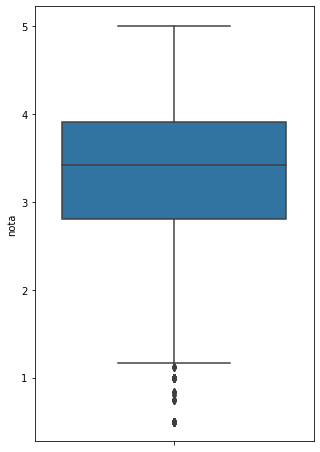

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,8))
sns.boxplot(y=medias_por_filme)

In [21]:
medias_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


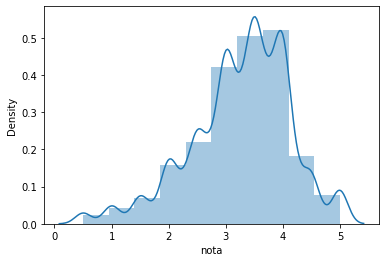

In [22]:
# Gráfico de distribuição
sns.distplot(medias_por_filme, bins = 10)

Text(0.5, 1.0, 'Histograma das médias dos filmes')

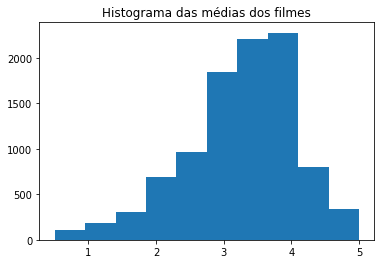

In [23]:

plt.hist(medias_por_filme)
plt.title("Histograma das médias dos filmes")

# 3. Variáveis

Utilizando a base de dados **TMDB 5000 Movie Dataset**

Fonte: https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [26]:
# importando csv
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [27]:
#Verificando os valores das linguas
tmdb.original_language.unique() # (Categórica nominal)

# --------------------------------------------
#Será exibido uma variável categórica 

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

* Primeiro grau [Ensino Fundamental]
* Segundo grau [Ensino Médio]
* Terceiro grau [Ensino Superior]
  * 1 grau < 2 grau < 3 grau (Categórica ordinal)


Na categorica ordinal, <font color='red'>não temos uma soma </font> (1ºgrau + 2ºgrau = 3ºgrau)  

Na categoria ordinal, não temos a facilidade de operar as operações aritméticas


---
No DataFrame tmdb a coluna **budget**  é **quantitativo contínuo** (e no caso é até continuo, podendo ser 0, 500 ou infinitos valores no meio)

---
No DataFrame tmdb a coluna **vote_average**, **quantitativa intervalar** (quantidade de votos é 1, 2 ,3 ou 4. Não tem 2.5 votos)


---
Para saber mais sobre Tipos de variáveis: http://leg.ufpr.br/~silvia/CE055/node8.html

In [30]:
#Contando os valores -> exibindo o index
tmdb["original_language"].value_counts().index

Index(['en', 'fr', 'es', 'de', 'zh', 'hi', 'ja', 'it', 'cn', 'ko', 'ru', 'pt',
       'da', 'sv', 'fa', 'nl', 'th', 'he', 'ro', 'ar', 'id', 'cs', 'ta', 'hu',
       'xx', 'vi', 'ps', 'nb', 'pl', 'af', 'no', 'sl', 'ky', 'te', 'is', 'el',
       'tr'],
      dtype='object')

In [31]:
#Contando os valores -> exibindo os valores
tmdb["original_language"].value_counts().values

array([4505,   70,   32,   27,   27,   19,   16,   14,   12,   11,   11,
          9,    7,    5,    4,    4,    3,    3,    2,    2,    2,    2,
          2,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1])

In [35]:
#Contando os valores --> transformando em um data_frame
tmdb["original_language"].value_counts().to_frame()

,original_language
en,4505
fr,70
es,32
de,27
zh,27
hi,19
ja,16
it,14
cn,12
ko,11


In [36]:
#Contando os valores --> transformando em um data_frame E retirando o index
tmdb["original_language"].value_counts().to_frame().reset_index()

,index,original_language
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27
5,hi,19
6,ja,16
7,it,14
8,cn,12
9,ko,11


In [38]:
#Contando os valores --> transformando em um data_frame E retirando o index

#Atribuindo a uma variável
contagem_de_lingua = tmdb["original_language"].value_counts().to_frame().reset_index()

#renomenado
contagem_de_lingua.columns = ["original_language", "total"]

#Exibindo o DF;
contagem_de_lingua.head()

,original_language,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


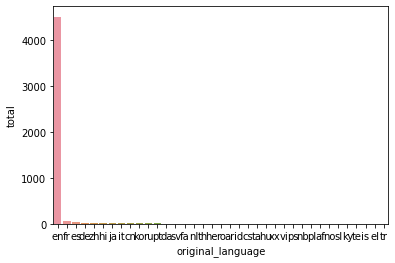

In [47]:
#Visualizando as categorias 
#----------------------------------------------------
#Para comparar as categorias, vamos plotar as categorias
sns.barplot(x="original_language", y="total", data=contagem_de_lingua) #baixo nível

Gráfico do tipo <font color="green">**catplot()**</font> [somente versões 0.9.0 +]

→ Mais alto nível do que o **barplot()**

kind="count" → contar as quantidade do que foi passado por parâmetros

documentação: https://seaborn.pydata.org/generated/seaborn.catplot.html

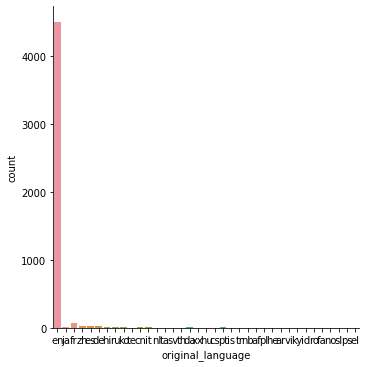

In [48]:
#Plot mais alto nível do que o barplot()

#
sns.catplot(x="original_language", kind="count", data=tmdb)